<a href="https://colab.research.google.com/github/jmlDC/MediaBias-Thesis22-23/blob/MFC/MFC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MFC

## Mounting Gdrive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

dir  = "/content/gdrive/MyDrive/THESIS-MS/Git-Thesis22-23/"

Mounted at /content/gdrive


## Imports

In [ ]:
import pandas as pd

## Functions

In [ ]:
# https://stackoverflow.com/questions/55695479/why-cant-i-sort-a-list-of-dicts-in-3-x-why-do-i-get-typeerror-not-suppor
# https://www.trainingint.com/how-to-find-duplicates-in-a-python-list.html#:~:text=list%20contains%20duplicates-,mylist%20%3D%20%5B5%2C%203%2C%205%2C%202%2C%201,5%20%26%206%20are%20duplicate%20numbers.&text=Alternatively%2C%20we%20can%20create%20a,to%20alert%20us%20of%20duplicates.&text=return%20False-,mylist%20%3D%20%5B5%2C%203%2C%205%2C%202%2C%201,repeated%20number%20in%20the%20list.

from operator import itemgetter
def return_duplicates(mylist=[]):
    duplist = [] # empty list to hold the duplicate elements from the list
    sorted_list = sorted(mylist, key=itemgetter('start'))
    for index, item in enumerate(sorted_list):
        # print(item)
        try:
            if(item['code'] == sorted_list[index+1]['code'] 
               and (item['start'] == sorted_list[index+1]['start'] or item['start']+1 == sorted_list[index+1]['start']) 
               and (item['end'] == sorted_list[index+1]['end'] or item['end']+1 == sorted_list[index+1]['end'])
               ):
                if item not in duplist:
                    duplist.append(item)
        except IndexError:
            pass      
    return duplist

def adding_duplicate_annotationsDF(df):

    workingDF = df[['annotations','headline_frame','primary_frame', 'text']].copy()
    workingDF.insert(loc=4,  column='duplicates_annotations', value="")

    for index, x in enumerate(df['annotations']):
        annotator = x['framing']
        dupli = []
        # print('r', annotator)
        if len(annotator) != 0:
            for a in annotator:
                # print(a)
                for c in x['framing'][a]:
                    # print(c)
                    dupli.append(c)
            # print(return_duplicates(dupli))
            workingDF.iat[index, 4]= return_duplicates(dupli)
        # else:
            
    workingDF.dropna(
        axis=0,
        how='any',
        inplace=True
    )

    return workingDF
    

In [ ]:
# Problem with PRIMARY
# uniforming the codes


def connect_annotation_code(df):
    new_df = pd.DataFrame(columns=['code_frames', 'annotations'])

    for index, row in enumerate(df['duplicates_annotations']):
        annot_sentence = ""
        for n in row:
            code_frame = n['code']//1
            text =  (df['text'].iloc[index][n['start']:n['end']])
            if text not in 'PRIMARY':
                new_row = pd.DataFrame({'code_frames': code_frame, 'annotations':text}, index=[0])
                new_df = pd.concat([new_df.loc[:],new_row]).reset_index(drop=True) 
            # else:
            #     new_row = pd.DataFrame({'code_frames': code_frame, 'annotations':df['text'].iloc[index]}, index=[0])
            #     new_df = pd.concat([new_df.loc[:],new_row]).reset_index(drop=True) 
                
    return new_df

In [ ]:
def produce_dataset(df):
    return connect_annotation_code(adding_duplicate_annotationsDF(df))

In [ ]:
st = 'a is an apple. and fruit'
sb = 'an apple is a is an apple. and fruit is for banana'
sa = 'a is an apple.'
for s in sb.split("."):
    for m in st.split("."):
        print(m in s, m, s)

s = 'apple is an apple'
print(s.split("."))

sa in st

True a is an apple an apple is a is an apple
False  and fruit an apple is a is an apple
False a is an apple  and fruit is for banana
True  and fruit  and fruit is for banana
['apple is an apple']


True

## DATASETS

### Immigration

In [ ]:
IMM_df = pd.read_json(f'{dir}mfc_v4.0/immigration/immigration_labeled.json')
IMM_df = IMM_df.T
IMM_df

,annotations,headline_frame,irrelevant,primary_frame,primary_tone,text,year,month,day,source
Immigration1.0-10005,"{'framing': {'hannah_47.0_r': [{'code': 10.2, ...",10.1,0,10.2,17,IMM-10005\n\nPRIMARY\n\nImmigrants without HOP...,2001,8,15,atlanta journal and constitution
Immigration1.0-10006,"{'framing': {'alex_54.0_r': [{'code': 5.2, 'en...",15.1,0,5.2,19,"IMM-10006\n\nPRIMARY\n\nReaction to Tancredo, ...",2001,8,15,denver post
Immigration1.0-10013,"{'framing': {'jeremy_44.0_r': [{'code': 2.2, '...",1.1,0,2.2,19,"IMM-10013\n\nPRIMARY\n\n$50,000 per entry\n\nT...",2001,8,14,herald-sun
Immigration1.0-10015,"{'framing': {'corey_55.0_r': [{'code': 10.2, '...",None,0,10.2,17,IMM-10015\n\nPRIMARY\n\nDangerous crossing; PU...,2001,8,13,atlanta journal and constitution
Immigration1.0-10018,"{'framing': {'haley_46.0_r': [{'code': 11.2, '...",None,0,None,None,IMM-10018\n\nPRIMARY\n\nCHILDREN OF LATINO IMM...,2001,8,13,san jose mercury news
...,...,...,...,...,...,...,...,...,...,...
Immigration1.0-9981,"{'framing': {'allie_54.0_r': [{'code': 13.2, '...",13.1,0,13.2,17,IMM-9981\n\nPRIMARY\n\nBush Goes Slow on Immig...,2001,8,20,washington post
Immigration1.0-9983,"{'framing': {'haley_49.0_r': [{'code': 2.2, 'e...",None,0,2.2,19,IMM-9983\n\nPRIMARY\n\nTHE OPEN FORUM\n\nLAMM ...,2001,8,19,denver post
Immigration1.0-9986,"{'framing': {'corey_43.0_r': [{'code': 12.2, '...",None,0,12.2,19,IMM-9986\n\nPRIMARY\n\nImmigration Foes Find P...,2001,8,19,washington post
Immigration1.0-9987,"{'framing': {'corey_54.0_r': [{'code': 13.2, '...",None,0,13.2,17,IMM-9987\n\nPRIMARY\n\nEasy immigration finds ...,2001,8,18,atlanta journal and constitution


In [ ]:
annoteDS_im = produce_dataset(IMM_df)
annoteDS_im

,code_frames,annotations
0,10.0,Immigrants without HOPE need help entering col...
1,5.0,"But in the eyes of the law, he is an illegal i..."
2,15.0,"Reaction to Tancredo, Lamm as predicted"
3,13.0,"That, said the congressman, is what always hap..."
4,1.0,"$50,000 per entry"
...,...,...
7174,12.0,"Of the 1,000 likely voters surveyed this month..."
7175,12.0,"Without such criteria, voters were split 40 pe..."
7176,13.0,Bush Goes Slow on Immigrant Amnesty; Resistanc...
7177,13.0,"President Bush, who hopes to unveil his much-a..."


### Gun Control

In [ ]:
GC_df = pd.read_json(f'{dir}mfc_v4.0/guncontrol/guncontrol_labeled.json')
GC_df = GC_df.T
GC_df

,annotations,headline_frame,irrelevant,primary_frame,primary_tone,text,year,month,day,source
gun_control1.0-10,"{'framing': {}, 'irrelevant': {'hannah_122.0_r...",None,1,None,None,GUN-10\n\nPRIMARY\n\nNJ argues before NJ Sup C...,1975,5,13,new york times
gun_control1.0-10007,"{'framing': {'marc_134.0_r': [{'code': 13.2, '...",7.1,0,13.2,19,"GUN-10007\n\nPRIMARY\n\nCHANGE THE LAWS, PROTE...",2005,12,21,daily news
gun_control1.0-10008,"{'framing': {'gareth_117.0_r': [{'code': 7.2, ...",6.1,0,7.2,19,GUN-10008\n\nPRIMARY\n\nTIME FOR ALBANY TO GET...,2005,12,18,daily news
gun_control1.0-10013,"{'framing': {'acacia_133.0_r': [{'code': 5.2, ...",5.1,0,5.2,18,GUN-10013\n\nPRIMARY\n\nMan found not guilty i...,2005,12,16,denver post
gun_control1.0-10014,"{'framing': {'allie_134.0_r': [{'code': 13.2, ...",7.1,0,13.2,18,GUN-10014\n\nPRIMARY\n\nPolice Deaths And Stal...,2005,12,15,new york times
...,...,...,...,...,...,...,...,...,...,...
gun_control1.0-9985,"{'framing': {'allie_117.0_r': [{'code': 5.2, '...",3.1,0,5.2,19,GUN-9985\n\nPRIMARY\n\nCHURCH WINS ROUND IN GU...,2004,1,14,saint paul pioneer press
gun_control1.0-9988,"{'framing': {'griffin_130.0_r': [{'code': 7.2,...",7.1,0,7.2,None,GUN-9988\n\nPRIMARY\n\nReport Details Crime Gu...,2004,1,13,washington post
gun_control1.0-9989,{'framing': {'brandon_133.0_r': [{'code': 13.2...,6.1,0,13.2,17,"GUN-9989\n\nPRIMARY\n\nOn Gun Control, Dean Ai...",2004,1,9,washington post
gun_control1.0-9990,"{'framing': {'jade_129.0_r': [{'code': 5.2, 'e...",7.1,0,5.2,17,GUN-9990\n\nPRIMARY\n\nEX-SHERIFF'S AIDE FIGHT...,2004,1,8,saint paul pioneer press


In [ ]:
annoteDS_gc = produce_dataset(GC_df)
annoteDS_gc

,code_frames,annotations
0,7.0,"CHANGE THE LAWS, PROTECT THE POLICE"
1,6.0,TIME FOR ALBANY TO GET TOUGH ON GUNS
2,7.0,after the recent murders of Detectives Dillon ...
3,7.0,Knott and three other people beat Hill as he ...
4,7.0,", he wants gun shops to open their records to ..."
...,...,...
14694,6.0,"On Gun Control, Dean Aims for the Center"
14695,13.0,"As governor of Vermont -- a small, rural state..."
14696,7.0,EX-SHERIFF'S AIDE FIGHTS DENIAL OF GUN PERMIT
14697,7.0,Concerted effort urged to fight crime in N. Ph...


### Death Penalty

In [ ]:
DP_df = pd.read_json(f'{dir}mfc_v4.0/deathpenalty/deathpenalty_labeled.json')
DP_df = DP_df.T
DP_df

,annotations,headline_frame,irrelevant,primary_frame,primary_tone,text,year,month,day,source
death_penalty_100,{'framing': {'sabrina_167.recode_r': [{'code':...,13.1,0,13.2,None,DEA-100\n\nPRIMARY\n\nJERSEY'S ASSEMBLY APPROV...,1983,6,24,new york times
death_penalty_10005,"{'framing': {}, 'irrelevant': {'marc_163.2_r':...",None,1,None,None,DEA-10005\n\nPRIMARY\n\nDEATH SENTENCE IN DEPU...,1997,6,14,san jose mercury news
death_penalty_10006,"{'framing': {'marc_171.2_r': [{'code': 10.2, '...",7.1,0,10.2,17,DEA-10006\n\nPRIMARY\n\n2 MEN ORDERED TO DIE S...,1997,6,14,san jose mercury news
death_penalty_10013,{'framing': {'jade_168.recode_r': [{'code': 8....,8.1,0,8.2,17,DEA-10013\n\nPRIMARY\n\nREPRISAL HINT AT MCVEI...,1997,6,13,daily news
death_penalty_10017,{'framing': {'jade_163.recode_r': [{'code': 5....,None,0,5.2,None,"DEA-10017\n\nPRIMARY\n\n'Cruel, unusual' uncle...",1997,6,13,denver post
...,...,...,...,...,...,...,...,...,...,...
death_penalty_9964,{'framing': {'priscilla_168.recode_r': [{'code...,15.1,0,4.2,19,DEA-9964\n\nPRIMARY\n\nJune 8-14; Open-Handed ...,1997,6,15,new york times
death_penalty_9967,{'framing': {'kaleigh_170.recode_r': [{'code':...,5.1,0,5.2,18,DEA-9967\n\nPRIMARY\n\nDEATH OR LIFE: PENALTY ...,1997,6,15,philadelphia inquirer
death_penalty_9969,"{'framing': {}, 'irrelevant': {'sabrina_167.re...",None,1,None,None,DEA-9969\n\nPRIMARY\n\nAS THEY SEE IT\n\n'It's...,1997,6,15,san jose mercury news
death_penalty_9975,"{'framing': {}, 'irrelevant': {}, 'tone': {'ma...",None,None,None,18,DEA-9975\n\nPRIMARY\n\nTIMOTHY McVEIGH SENTENC...,1997,6,14,atlanta journal and constitution


In [ ]:
annoteDS_dp = produce_dataset(DP_df)
annoteDS_dp

,code_frames,annotations
0,13.0,JERSEY'S ASSEMBLY APPROVES DEATH-BY-INJECTION ...
1,7.0,2 MEN ORDERED TO DIE SENTENCE IN SLAYING OF ST...
2,10.0,As the victim's wife struggled to make sense o...
3,7.0,sentenced to death the two men who murdered th...
4,10.0,Both the victim's wife and Travis addressed th...
...,...,...
8977,5.0,DEATH OR LIFE: PENALTY PHASE ALL-IMPORTANT / T...
8978,10.0,Timothy McVeigh loved chocolate-covered cherri...
8979,5.0,", the defense argued"
8980,5.0,"""In these penalty phases, the courts are open ..."


### Same Sex

In [ ]:
SS_df = pd.read_json(f'{dir}mfc_v4.0/samesex/samesex_labeled.json')
SS_df = SS_df.T
SS_df

,annotations,headline_frame,irrelevant,primary_frame,primary_tone,text,year,month,day,source
same-sex_marriage1.0-10,"{'framing': {}, 'irrelevant': {}, 'tone': {'kr...",None,None,None,17,SSM-10\n\nPRIMARY\n\nDEAD MAN'S LAWYERS PURSUE...,2002,11,10,st. louis post-dispatch
same-sex_marriage1.0-100,"{'framing': {}, 'irrelevant': {}, 'tone': {}}",None,None,None,None,SSM-100\n\nPRIMARY\n\nSTATE HIGH COURT REJECTS...,2002,1,4,san jose mercury news
same-sex_marriage1.0-1000,"{'framing': {}, 'irrelevant': {'claire_86.0_r'...",None,1,None,19,SSM-1000\n\nPRIMARY\n\nMinister preaches about...,2004,2,14,atlanta journal and constitution
same-sex_marriage1.0-10000,"{'framing': {}, 'irrelevant': {}, 'tone': {'da...",None,None,None,18,SSM-10000\n\nPRIMARY\n\nThe Nation; Civil Righ...,1996,9,15,new york times
same-sex_marriage1.0-10001,"{'framing': {}, 'irrelevant': {}, 'tone': {'al...",None,None,None,19,SSM-10001\n\nPRIMARY\n\nAtlanta Sued Over Its ...,1996,9,15,new york times
...,...,...,...,...,...,...,...,...,...,...
same-sex_marriage1.0-9995,"{'framing': {'claire_86.0_r': [{'code': 12.2, ...",6.1,0,12.2,19,SSM-9995\n\nPRIMARY\n\nSAME-SEX PAIRS DEALT A ...,1996,9,19,san jose mercury news
same-sex_marriage1.0-9996,"{'framing': {}, 'irrelevant': {}, 'tone': {'ha...",None,None,None,17,SSM-9996\n\nPRIMARY\n\nDenver Extends Health C...,1996,9,18,new york times
same-sex_marriage1.0-9997,"{'framing': {}, 'irrelevant': {}, 'tone': {'al...",None,None,None,17,SSM-9997\n\nPRIMARY\n\n...Voting One's Conscie...,1996,9,17,washington post
same-sex_marriage1.0-9998,"{'framing': {}, 'irrelevant': {}, 'tone': {'da...",None,None,None,19,SSM-9998\n\nPRIMARY\n\nUptoSpeed; THE WEEK'S T...,1996,9,15,atlanta journal and constitution


In [ ]:
annoteDS_ss = produce_dataset(SS_df)
annoteDS_ss

,code_frames,annotations
0,6.0,Bills don't measure gays' progress
1,13.0,WHO ASKED SENATE TO DEFEND MARRIAGE?
2,5.0,I realize that the courts in Hawaii have been ...
3,5.0,And I also realize that the most recent trial ...
4,5.0,"After all, a decision in Baehr vs. Miike isn'..."
...,...,...
9059,4.0,"""Why are these people who seem committed to di..."
9060,6.0,SAME-SEX PAIRS DEALT A SETBACK ON REGISTRY LAW...
9061,12.0,"Bearing boxes stacked with petitions, opponent..."
9062,6.0,"The ordinance would allow two adults, of any g..."


### Tobacco

In [ ]:
tab_df = pd.read_json(f'{dir}mfc_v4.0/tobacco/tobacco_labeled.json')
tab_df = tab_df.T
tab_df

,annotations,headline_frame,irrelevant,primary_frame,primary_tone,text,year,month,day,source
Tobacco1.0-100,"{'framing': {'laura_99.0_r': [{'code': 1.2, 'e...",14.1,0,1.2,18,TOB-100\n\nPRIMARY\n\nTobacco firms find hospi...,1990,10,16,usa today
Tobacco1.0-10003,"{'framing': {}, 'irrelevant': {}, 'tone': {'ha...",None,None,None,19,TOB-10003\n\nPRIMARY\n\nTOBACCO RULE SOMETHING...,1996,6,2,st. louis post-dispatch
Tobacco1.0-10004,"{'framing': {}, 'irrelevant': {'gareth_94.0_r'...",None,1,None,None,TOB-10004\n\nPRIMARY\n\nAround the South; Regi...,1996,6,1,atlanta journal and constitution
Tobacco1.0-10005,"{'framing': {'jeremy_99.0_r': [{'code': 3.2, '...",3.1,0,3.2,17,TOB-10005\n\nPRIMARY\n\nTobacco supporters pra...,1996,6,1,herald-sun
Tobacco1.0-10012,"{'framing': {'hannah_97.0_r': [{'code': 9.2, '...",3.1,0,9.2,19,TOB-10012\n\nPRIMARY\n\nBRIEFING\n\nMESA TO FL...,1995,12,29,denver post
...,...,...,...,...,...,...,...,...,...,...
Tobacco1.0-9971,"{'framing': {}, 'irrelevant': {'jeremy_92.0_r'...",None,1,None,None,TOB-9971\n\nPRIMARY\n\nHEALTH WATCH; Study tar...,1996,6,11,atlanta journal and constitution
Tobacco1.0-9973,"{'framing': {'dana_93.0_r': [{'code': 4.2, 'en...",11.1,0,4.2,17,TOB-9973\n\nPRIMARY\n\nSmoking is becoming a s...,1996,6,11,denver post
Tobacco1.0-9977,"{'framing': {'gareth_93.0_r': [{'code': 5.2, '...",15.1,0,5.2,17,TOB-9977\n\nPRIMARY\n\n'Ashes to Ashes'\n\nTo ...,1996,6,9,new york times
Tobacco1.0-9979,"{'framing': {'corey_98.0_r': [{'code': 11.2, '...",15.1,0,11.2,19,TOB-9979\n\nPRIMARY\n\nSMOKE SCREEN IS SEEN BE...,1996,6,9,st. louis post-dispatch


In [ ]:
annoteDS_tab = produce_dataset(tab_df)
annoteDS_tab

,code_frames,annotations
0,14.0,Tobacco firms find hospitality abroad
1,1.0,U.S. tobacco interests are keeping a low profi...
2,1.0,''You're talking millions and millions in gain...
3,6.0,"Earlier this year, smoking was banned on almos..."
4,3.0,Tobacco supporters pray for divine help
...,...,...
6870,11.0,Smoking is becoming a social taboo
6871,5.0,Nor does it aid lawyers seeking novel ways to...
6872,15.0,'Ashes to Ashes'
6873,15.0,SMOKE SCREEN IS SEEN BEHIND THE SMOKELESS


#Try

In [ ]:
tab_dup_df = adding_duplicate_annotationsDF(tab_df)
# tab_dup_df[['text','duplicates_annotations']]
tab_dup_df

,annotations,headline_frame,primary_frame,text,duplicates_annotations
Tobacco1.0-100,"{'framing': {'laura_99.0_r': [{'code': 1.2, 'e...",14.1,1.2,TOB-100\n\nPRIMARY\n\nTobacco firms find hospi...,"[{'code': 1.2, 'end': 16, 'start': 9}, {'code'..."
Tobacco1.0-10005,"{'framing': {'jeremy_99.0_r': [{'code': 3.2, '...",3.1,3.2,TOB-10005\n\nPRIMARY\n\nTobacco supporters pra...,"[{'code': 3.2, 'end': 18, 'start': 11}, {'code..."
Tobacco1.0-10012,"{'framing': {'hannah_97.0_r': [{'code': 9.2, '...",3.1,9.2,TOB-10012\n\nPRIMARY\n\nBRIEFING\n\nMESA TO FL...,"[{'code': 9.2, 'end': 18, 'start': 11}, {'code..."
Tobacco1.0-10017,"{'framing': {'allie_93.0_r': [{'code': 9.2, 'e...",9.1,9.2,TOB-10017\n\nPRIMARY\n\nAGENCY MAY CHANGE WAY ...,"[{'code': 9.2, 'end': 18, 'start': 11}, {'code..."
Tobacco1.0-10039,"{'framing': {'alec_95.0_r': [{'code': 6.2, 'en...",1.1,6.2,TOB-10039\n\nPRIMARY\n\nActivists: Tobacco sal...,"[{'code': 1.1, 'end': 63, 'start': 20}]"
...,...,...,...,...,...
Tobacco1.0-997,{'framing': {'stephanie_94.0_r': [{'code': 9.2...,15.1,9.2,TOB-997\n\nPRIMARY\n\nQ & A ON THE NEWS\n\nDo ...,[]
Tobacco1.0-9973,"{'framing': {'dana_93.0_r': [{'code': 4.2, 'en...",11.1,4.2,TOB-9973\n\nPRIMARY\n\nSmoking is becoming a s...,"[{'code': 4.2, 'end': 17, 'start': 10}, {'code..."
Tobacco1.0-9977,"{'framing': {'gareth_93.0_r': [{'code': 5.2, '...",15.1,5.2,TOB-9977\n\nPRIMARY\n\n'Ashes to Ashes'\n\nTo ...,"[{'code': 5.2, 'end': 17, 'start': 10}, {'code..."
Tobacco1.0-9979,"{'framing': {'corey_98.0_r': [{'code': 11.2, '...",15.1,11.2,TOB-9979\n\nPRIMARY\n\nSMOKE SCREEN IS SEEN BE...,"[{'code': 11.2, 'end': 17, 'start': 10}, {'cod..."


In [ ]:
# # char
# l = []
# for index, x in enumerate(st):
#     cod = ""
#     if index >= 57 and index <227:
#         # cod += x
#         l.append(x)
        
# print(l)
    
tab_dup_df['text'].iloc[0][9:16]

'PRIMARY'

## here

In [ ]:
dataset_tab= connect_annotation_code(tab_dup_df)
dataset_tab

,code_frames,annotations
0,1.0,TOB-100\n\nPRIMARY\n\nTobacco firms find hospi...
1,14.0,Tobacco firms find hospitality abroad
2,1.0,U.S. tobacco interests are keeping a low profi...
3,1.0,''You're talking millions and millions in gain...
4,6.0,"Earlier this year, smoking was banned on almos..."
...,...,...
10055,15.0,'Ashes to Ashes'
10056,11.0,TOB-9979\n\nPRIMARY\n\nSMOKE SCREEN IS SEEN BE...
10057,15.0,SMOKE SCREEN IS SEEN BEHIND THE SMOKELESS
10058,9.0,TOB-9998\n\nPRIMARY\n\nCIGARETTE MAKERS AND TH...


In [ ]:
dt_tab = produce_dataset(tab_df)
dt_tab

,code_frames,annotations
0,14.0,Tobacco firms find hospitality abroad
1,1.0,U.S. tobacco interests are keeping a low profi...
2,1.0,''You're talking millions and millions in gain...
3,6.0,"Earlier this year, smoking was banned on almos..."
4,3.0,Tobacco supporters pray for divine help
...,...,...
6870,11.0,Smoking is becoming a social taboo
6871,5.0,Nor does it aid lawyers seeking novel ways to...
6872,15.0,'Ashes to Ashes'
6873,15.0,SMOKE SCREEN IS SEEN BEHIND THE SMOKELESS


# END

In [ ]:

# 46799

In [ ]:
ALL_df = pd.concat([annoteDS_im, annoteDS_gc, annoteDS_dp, annoteDS_ss, annoteDS_tab])
ALL_df

,code_frames,annotations
0,10.0,Immigrants without HOPE need help entering col...
1,5.0,"But in the eyes of the law, he is an illegal i..."
2,15.0,"Reaction to Tancredo, Lamm as predicted"
3,13.0,"That, said the congressman, is what always hap..."
4,1.0,"$50,000 per entry"
...,...,...
6870,11.0,Smoking is becoming a social taboo
6871,5.0,Nor does it aid lawyers seeking novel ways to...
6872,15.0,'Ashes to Ashes'
6873,15.0,SMOKE SCREEN IS SEEN BEHIND THE SMOKELESS


In [6]:
import pandas
df = pandas.read_csv(f'{dir}Official/MFC_prepared.csv')
df['code_frames'] = df['code_frames'].astype(int)
df

,Unnamed: 0,code_frames,annotations
0,0,10,Immigrants without HOPE need help entering col...
1,1,5,"But in the eyes of the law, he is an illegal i..."
2,2,15,"Reaction to Tancredo, Lamm as predicted"
3,3,13,"That, said the congressman, is what always hap..."
4,4,1,"$50,000 per entry"
...,...,...,...
46794,6870,11,Smoking is becoming a social taboo
46795,6871,5,Nor does it aid lawyers seeking novel ways to...
46796,6872,15,'Ashes to Ashes'
46797,6873,15,SMOKE SCREEN IS SEEN BEHIND THE SMOKELESS


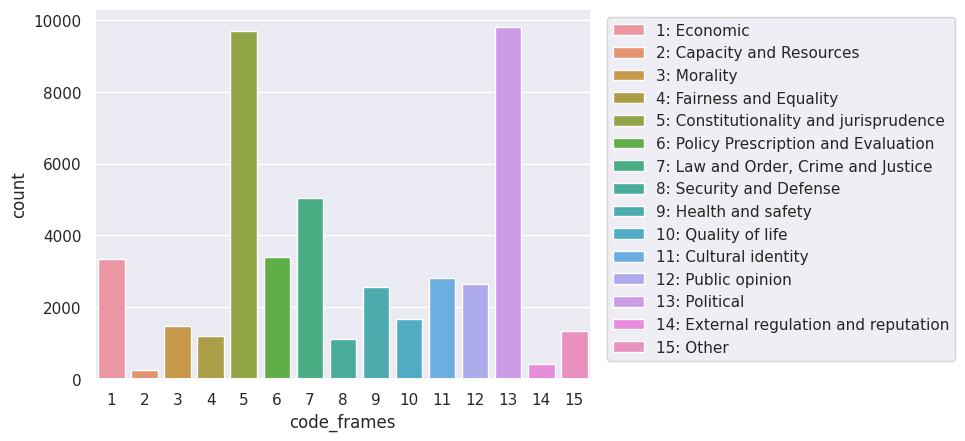

In [20]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.set(style="darkgrid")
ax = sns.countplot(x="code_frames", data=df, hue='code_frames', dodge=False)

plt.legend(labels = ['1: Economic', '2: Capacity and Resources', '3: Morality', '4: Fairness and Equality', '5: Constitutionality and jurisprudence', 
                     '6: Policy Prescription and Evaluation', '7: Law and Order, Crime and Justice', '8: Security and Defense', '9: Health and safety', '10: Quality of life',
                     '11: Cultural identity', '12: Public opinion', '13: Political', '14: External regulation and reputation', '15: Other'
                     ], loc='upper right', bbox_to_anchor=(1.75, 1))

plt.show()